HELP International PCA & CLustering assignment

In [505]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from numpy.linalg import svd
from sklearn.decomposition import PCA

In [506]:
# Read_Data
df = pd.read_csv(r"C:\Users\DK0046TX\Downloads\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [508]:
df.shape

(167, 10)

In [509]:
#Converting export,import and health column to values
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [510]:
#Drop the country column to have only numeric dataframe
numeric_df = df.drop('country', axis=1)

In [511]:
numeric_df.shape

(167, 9)

In [512]:
# Checking the percentage of missing values
round(100*(numeric_df.isnull().sum()/len(numeric_df.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Analysis and Model building part

In [513]:
# standardise the data (mean 0, sd=1)
numeric_df = df.drop('country', axis=1)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df.shape

C:\Users\DK0046TX\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DK0046TX\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(167, 9)

In [514]:
# PCA fit
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [515]:
# PCA transform
pca_df = pca.transform(scaled_df)
pca_df.shape

(167, 9)

In [516]:
# Store the first three PCs and their coefficients with the original variables
colnames = list(numeric_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2] ,'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,Feature
0,-0.316392,0.476267,-0.150012,child_mort
1,0.342887,0.397311,-0.030574,exports
2,0.358535,0.155053,-0.075703,health
3,0.344865,0.370781,-0.072174,imports
4,0.380041,0.128384,0.145764,income


In [517]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [518]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

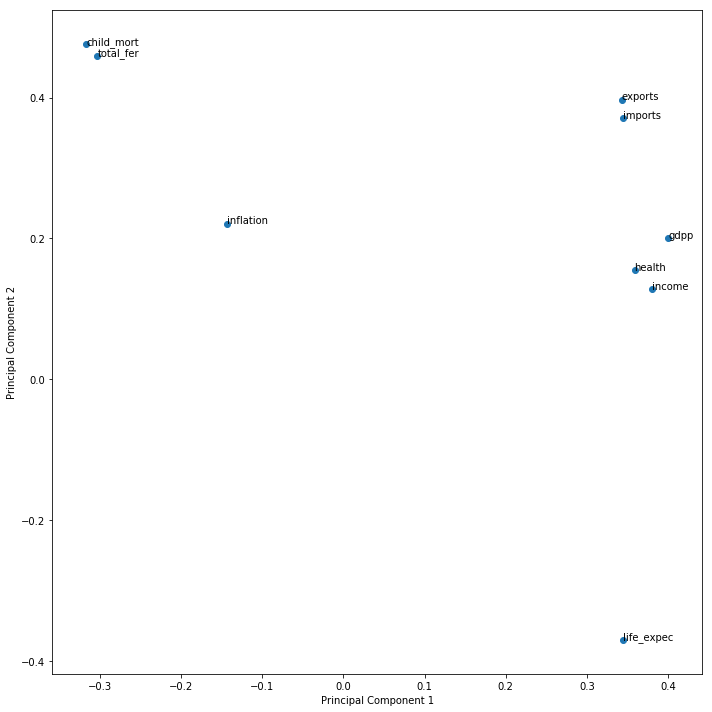

In [519]:
# plot the original variables along the PCs 
# this gives a sense of what the PCs 'might mean intuitively'
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

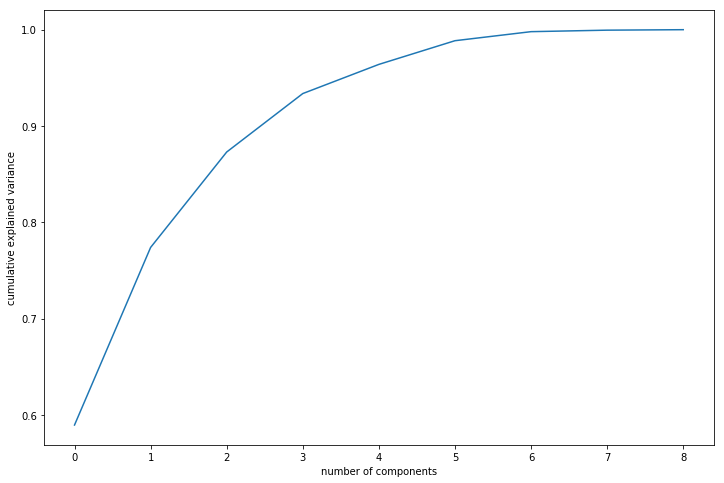

In [520]:
# the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [521]:
# PCA with three components
pca = PCA(n_components=3, svd_solver='randomized', random_state=42)
pca_df = pca.fit_transform(scaled_df)
pca_df.shape

(167, 3)

In [522]:
pca_df = pd.DataFrame(pca_df)
pca_df['country'] = df['country']
pca_df.columns = ['PC1', 'PC2','PC3','country']
pca_df.head()

,PC1,PC2,PC3,country
0,-2.635575,1.472267,-0.549489,Afghanistan
1,-0.024206,-1.429892,-0.014123,Albania
2,-0.459557,-0.675495,0.959355,Algeria
3,-2.722630,2.172332,0.600215,Angola
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda


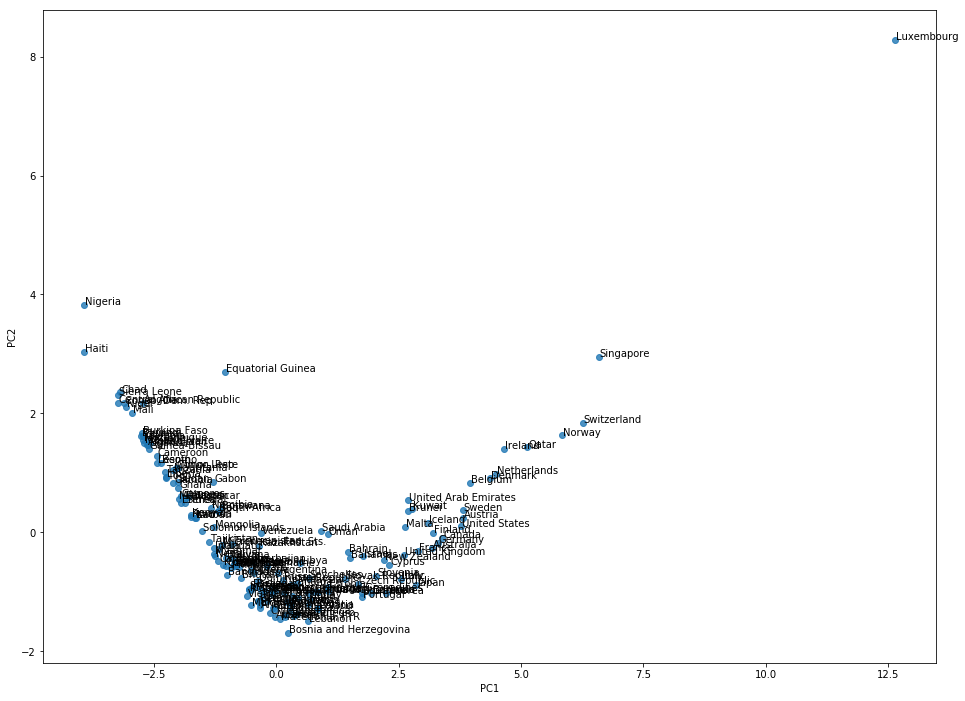

In [523]:
plt.figure(figsize=(16, 12))
sns.regplot(x='PC1', y='PC2', data=pca_df, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pca_df.PC1, pca_df.PC2, pca_df.country, plt.gca())

In [524]:
pca_df.head()

,PC1,PC2,PC3,country
0,-2.635575,1.472267,-0.549489,Afghanistan
1,-0.024206,-1.429892,-0.014123,Albania
2,-0.459557,-0.675495,0.959355,Algeria
3,-2.722630,2.172332,0.600215,Angola
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda


In [525]:
d1=pca_df.drop(['country'],axis=1)

In [526]:
d1.head()

,PC1,PC2,PC3
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430


{'whiskers': [<matplotlib.lines.Line2D at 0x27698d5e6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x27698d5ed68>,
 'boxes': [<matplotlib.lines.Line2D at 0x27698d5e2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x27699d89438>],
 'fliers': [<matplotlib.lines.Line2D at 0x27699d89780>],
 'means': []}

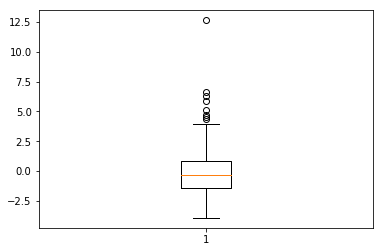

In [527]:
#Let's do the outlier analysis before proceeding to clustering
plt.boxplot(pca_df['PC1'])


{'whiskers': [<matplotlib.lines.Line2D at 0x27699ddfeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x27699de9588>,
 'boxes': [<matplotlib.lines.Line2D at 0x27699ddfa90>],
 'medians': [<matplotlib.lines.Line2D at 0x27699de9c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x27699de9f60>],
 'means': []}

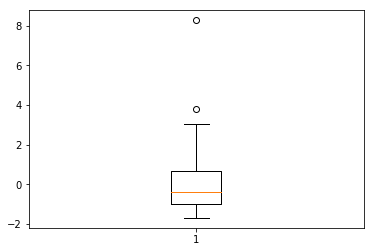

In [528]:
# outlier Analysis
plt.boxplot(pca_df['PC2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27699e34eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x27699e3e860>,
 'boxes': [<matplotlib.lines.Line2D at 0x27699e34d68>],
 'medians': [<matplotlib.lines.Line2D at 0x27699e3eef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27699e3ef98>],
 'means': []}

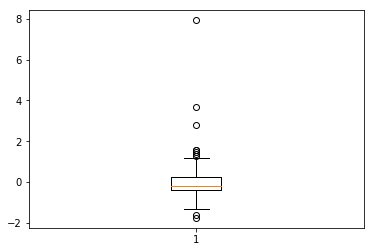

In [529]:
# outlier Analysis
plt.boxplot(pca_df['PC3'])

# Clustering

In [530]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [531]:
#Let's check the Hopkins measure
hopkins(d1)

0.9345170574867405

#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [532]:
# 2. rescaling
rfm_df = pca_df[['PC1', 'PC2', 'PC3']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 3)

In [533]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['PC1', 'PC2', 'PC3']
rfm_df_scaled.head()

,PC1,PC2,PC3
0,-1.144350,1.142679,-0.581793
1,-0.010510,-1.109790,-0.014954
2,-0.199537,-0.524276,1.015755
3,-1.182149,1.686023,0.635501
4,0.281617,-0.794325,-0.272564


In [534]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [535]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1])

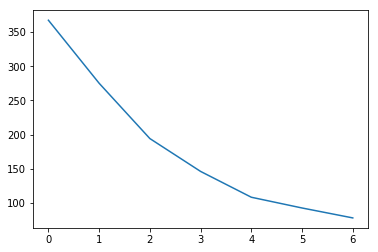

In [536]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [537]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4143541000103381
For n_clusters=3, the silhouette score is 0.4273580770854021
For n_clusters=4, the silhouette score is 0.4452403663455782
For n_clusters=5, the silhouette score is 0.4348456681259259
For n_clusters=6, the silhouette score is 0.4167234781843103
For n_clusters=7, the silhouette score is 0.39464873598832034
For n_clusters=8, the silhouette score is 0.37613415812572304


In [538]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [539]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2])

In [540]:
# assign the label
pca_df['cluster_id'] = kmeans.labels_
pca_df.head()

,PC1,PC2,PC3,country,cluster_id
0,-2.635575,1.472267,-0.549489,Afghanistan,2
1,-0.024206,-1.429892,-0.014123,Albania,0
2,-0.459557,-0.675495,0.959355,Algeria,0
3,-2.722630,2.172332,0.600215,Angola,2
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0


In [541]:
pca_df['cluster_id'].value_counts()

0    98
2    47
1    22
Name: cluster_id, dtype: int64

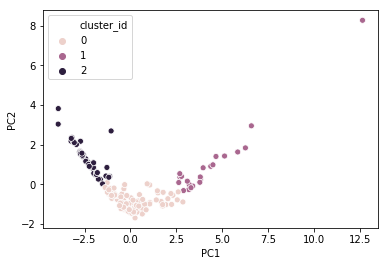

In [542]:
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=pca_df)

In [543]:
#Merging on 'country'
df1 = pd.merge(pca_df, df, how='inner', on='country')

In [544]:
df1.head()

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.635575,1.472267,-0.549489,Afghanistan,2,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,-0.024206,-1.429892,-0.014123,Albania,0,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,-0.459557,-0.675495,0.959355,Algeria,0,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,-2.722630,2.172332,0.600215,Angola,2,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [545]:
dat5=df1
dat5.head()

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.635575,1.472267,-0.549489,Afghanistan,2,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,-0.024206,-1.429892,-0.014123,Albania,0,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,-0.459557,-0.675495,0.959355,Algeria,0,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,-2.722630,2.172332,0.600215,Angola,2,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [546]:
#Countries grouped under clusterid 2
df1[df1['cluster_id'] == 2].head()

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.635575,1.472267,-0.549489,Afghanistan,2,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,-2.722630,2.172332,0.600215,Angola,2,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,-2.363962,1.171696,-1.247192,Benin,2,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
21,-1.129489,0.401611,-0.231994,Botswana,2,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350
25,-2.751480,1.664991,-0.848207,Burkina Faso,2,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575


In [547]:
#Countries grouped under clusterid 1
df1[df1['cluster_id'] == 1].head()

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,3.181525,-0.262485,-0.130870,Australia,1,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,3.816857,0.248363,-0.258960,Austria,1,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,3.961652,0.834321,-0.271693,Belgium,1,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
23,2.697079,0.358556,1.560534,Brunei,1,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
29,3.395234,-0.086883,-0.047607,Canada,1,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400


In [548]:
#Countries grouped under clusterid 0
df1[df1['cluster_id'] == 0].head()

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,-0.024206,-1.429892,-0.014123,Albania,0,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090
2,-0.459557,-0.675495,0.959355,Algeria,0,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200
5,0.035422,-0.685251,1.468697,Argentina,0,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300
6,-0.334555,-1.271889,0.190564,Armenia,0,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220


In [549]:
#List of countries which have high Child Mortality Rate which are in direst need of aid
df1 = df1.sort_values(by =['child_mort'])
df1.tail()

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
97,-2.944260,2.010103,-1.142610,Mali,2,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708
31,-3.236946,2.178414,-1.602973,Central African Republic,2,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
32,-3.185395,2.354073,-1.078613,Chad,2,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
132,-3.223706,2.317240,-0.109186,Sierra Leone,2,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
66,-3.937287,3.036998,-1.756335,Haiti,2,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662


In [550]:
#List of countries assigned with cluster id 1 i,e developed countries
pca_df[pca_df['cluster_id'] == 1].head()

,PC1,PC2,PC3,country,cluster_id
7,3.181525,-0.262485,-0.130870,Australia,1
8,3.816857,0.248363,-0.258960,Austria,1
15,3.961652,0.834321,-0.271693,Belgium,1
23,2.697079,0.358556,1.560534,Brunei,1
29,3.395234,-0.086883,-0.047607,Canada,1


In [551]:
#List of countries assigned with cluster id 2 i,e underdeveloped countries
pca_df[pca_df['cluster_id'] == 2].head()

,PC1,PC2,PC3,country,cluster_id
0,-2.635575,1.472267,-0.549489,Afghanistan,2
3,-2.722630,2.172332,0.600215,Angola,2
17,-2.363962,1.171696,-1.247192,Benin,2
21,-1.129489,0.401611,-0.231994,Botswana,2
25,-2.751480,1.664991,-0.848207,Burkina Faso,2


In [552]:
#List of countries assigned with cluster id 0  i,e developing countries
pca_df[pca_df['cluster_id'] == 0].head()

,PC1,PC2,PC3,country,cluster_id
1,-0.024206,-1.429892,-0.014123,Albania,0
2,-0.459557,-0.675495,0.959355,Algeria,0
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0
5,0.035422,-0.685251,1.468697,Argentina,0
6,-0.334555,-1.271889,0.190564,Armenia,0


#### Visualisation  with original Variables

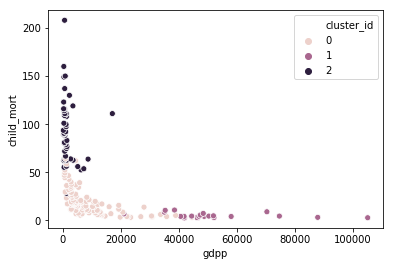

In [553]:
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',legend='full',data=df1)

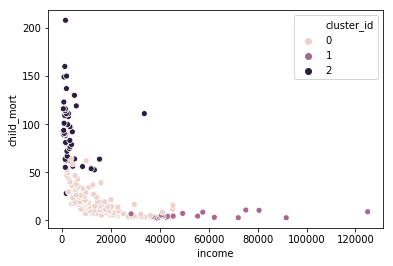

In [554]:
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',legend='full',data=df1)

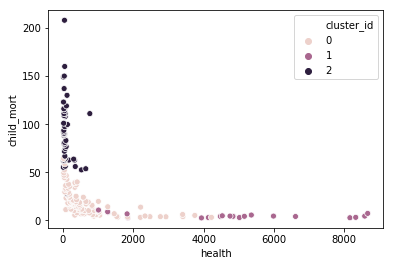

In [555]:
sns.scatterplot(x='health',y='child_mort',hue='cluster_id',legend='full',data=df1)

# Analysis of the clusters

In [556]:
clu_cm = pd.DataFrame(df1.groupby(["cluster_id"]).child_mort.mean())
clu_ex=  pd.DataFrame(df1.groupby(["cluster_id"]).exports.mean())
clu_he = pd.DataFrame(df1.groupby(["cluster_id"]).health.mean())
clu_im = pd.DataFrame(df1.groupby(["cluster_id"]).imports.mean())
clu_in = pd.DataFrame(df1.groupby(["cluster_id"]).income.mean())
clu_inf =  pd.DataFrame(df1.groupby(["cluster_id"]).inflation.mean())
clu_li = pd.DataFrame(df1.groupby(["cluster_id"]).life_expec.mean())
clu_fe = pd.DataFrame(df1.groupby(["cluster_id"]).total_fer.mean())
clu_gd = pd.DataFrame(df1.groupby(["cluster_id"]).gdpp.mean())

In [557]:
df1 = pd.concat([pd.Series([0,1,2]),clu_cm,clu_ex,clu_he,clu_im,clu_in,clu_inf,clu_li,clu_fe,clu_gd], axis=1)
df1

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,19.544898,3978.757128,711.600718,4105.403276,15211.122449,6.794990,73.873469,2.221224,9643.591837
1,1,5.240909,36768.322727,4618.390000,29989.200000,54459.090909,3.569182,80.313636,1.798636,51490.909091
2,2,92.774468,860.043596,109.212653,811.976191,3710.063830,11.811383,59.070213,5.001277,1854.085106


In [558]:
df1.reset_index(drop=True)

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,19.544898,3978.757128,711.600718,4105.403276,15211.122449,6.794990,73.873469,2.221224,9643.591837
1,1,5.240909,36768.322727,4618.390000,29989.200000,54459.090909,3.569182,80.313636,1.798636,51490.909091
2,2,92.774468,860.043596,109.212653,811.976191,3710.063830,11.811383,59.070213,5.001277,1854.085106


In [559]:
df1.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df1

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,19.544898,3978.757128,711.600718,4105.403276,15211.122449,6.794990,73.873469,2.221224,9643.591837
1,1,5.240909,36768.322727,4618.390000,29989.200000,54459.090909,3.569182,80.313636,1.798636,51490.909091
2,2,92.774468,860.043596,109.212653,811.976191,3710.063830,11.811383,59.070213,5.001277,1854.085106


#### From the above cluster analysis we can infer countries formed with cluster id 2 has high child mortality i,e under developed countries
#### Also the cluster id 1 has very low child mortality rate and has good GDP, Exports,and income i,e developed countries

In [560]:
#Let's use the concept of binning
country_bin = dat5[dat5['income']<=3710.06]
country_bin = dat5[dat5['gdpp']<=1854.08]
country_bin = dat5[dat5['child_mort']>5.2]

country_bin = country_bin.sort_values(by = 'PC1', ascending = True)
                                       
country_bin

,PC1,PC2,PC3,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,-3.937287,3.036998,-1.756335,Haiti,2,208.0,101.28600,45.7442,428.314000,1500,5.450,32.1,3.33,662
113,-3.931802,3.821230,7.928939,Nigeria,2,130.0,589.49000,118.1310,405.420000,5150,104.000,60.5,5.84,2330
31,-3.236946,2.178414,-1.602973,Central African Republic,2,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
132,-3.223706,2.317240,-0.109186,Sierra Leone,2,160.0,67.03200,52.2690,137.655000,1220,17.200,55.0,5.20,399
32,-3.185395,2.354073,-1.078613,Chad,2,150.0,330.09600,40.6341,390.195000,1930,6.390,56.5,6.59,897
37,-3.114930,2.170747,0.361477,"Congo, Dem. Rep.",2,116.0,137.27400,26.4194,165.664000,609,20.800,57.5,6.54,334
112,-3.060794,2.105242,-1.325128,Niger,2,123.0,77.25600,17.9568,170.868000,814,2.550,58.8,7.49,348
97,-2.944260,2.010103,-1.142610,Mali,2,137.0,161.42400,35.2584,248.508000,1870,4.370,59.5,6.55,708
26,-2.762440,1.628790,-0.299329,Burundi,2,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231
25,-2.751480,1.664991,-0.848207,Burkina Faso,2,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575


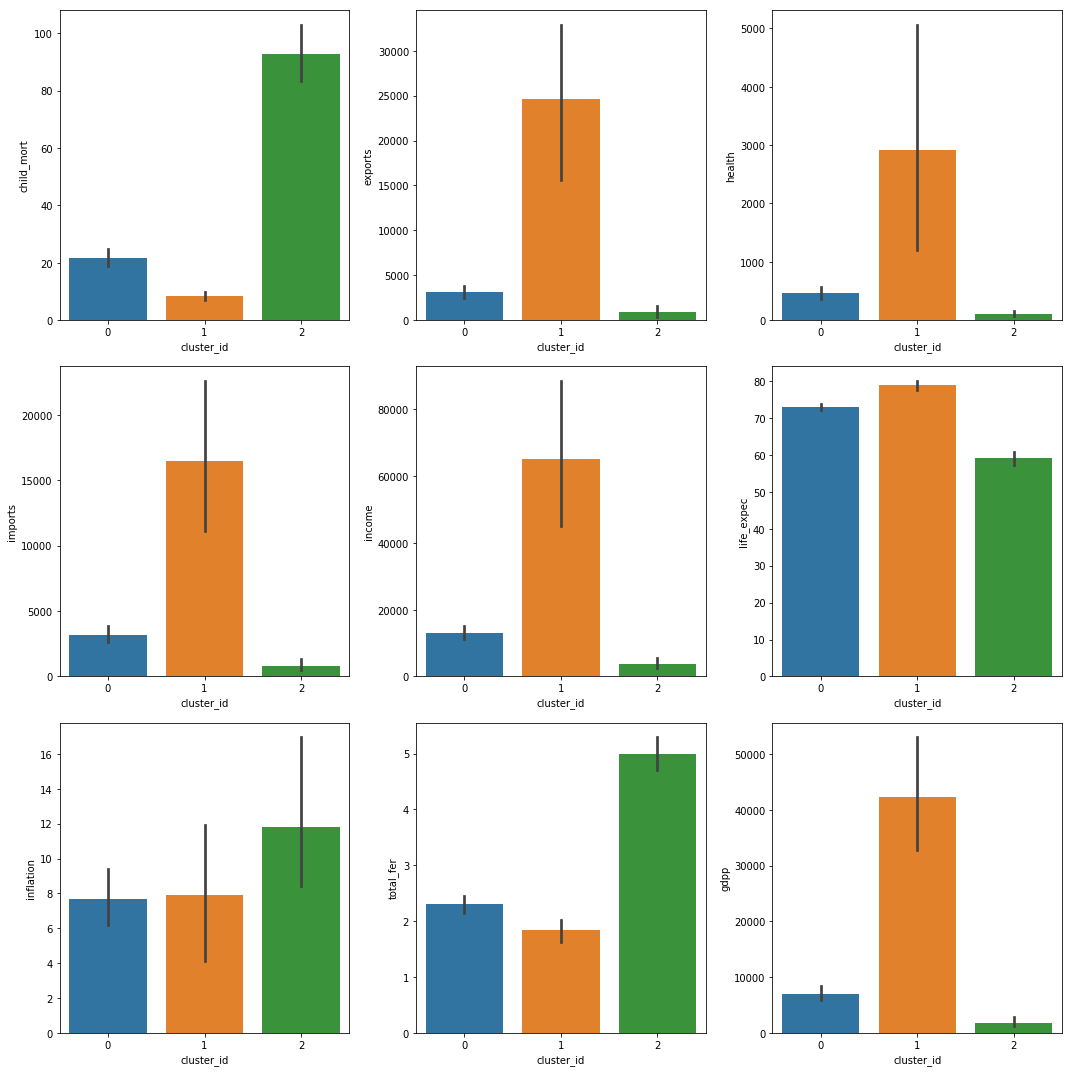

In [571]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=country_bin.cluster_id, y=country_bin.child_mort, ax = axs[0,0])
sns.barplot(x=country_bin.cluster_id, y=country_bin.exports, ax = axs[0,1])
sns.barplot(x=country_bin.cluster_id, y=country_bin.health, ax = axs[0,2])
sns.barplot(x=country_bin.cluster_id, y=country_bin.imports, ax = axs[1,0])
sns.barplot(x=country_bin.cluster_id, y=country_bin.income, ax = axs[1,1])
sns.barplot(x=country_bin.cluster_id, y=country_bin.life_expec, ax = axs[1,2])
sns.barplot(x=country_bin.cluster_id, y=country_bin.inflation, ax = axs[2,0])
sns.barplot(x=country_bin.cluster_id, y=country_bin.total_fer, ax = axs[2,1])
sns.barplot(x=country_bin.cluster_id, y=country_bin.gdpp, ax = axs[2,2])
plt.tight_layout()

## Hierarchical Clustering

In [561]:
rfm_df_scaled.head()

,PC1,PC2,PC3
0,-1.144350,1.142679,-0.581793
1,-0.010510,-1.109790,-0.014954
2,-0.199537,-0.524276,1.015755
3,-1.182149,1.686023,0.635501
4,0.281617,-0.794325,-0.272564


In [562]:
pca_df.head()

,PC1,PC2,PC3,country,cluster_id
0,-2.635575,1.472267,-0.549489,Afghanistan,2
1,-0.024206,-1.429892,-0.014123,Albania,0
2,-0.459557,-0.675495,0.959355,Algeria,0
3,-2.722630,2.172332,0.600215,Angola,2
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0


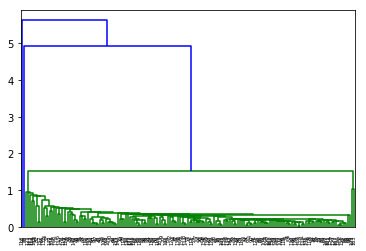

In [563]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

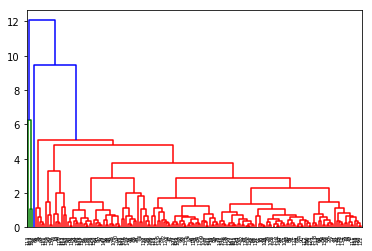

In [564]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [565]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [566]:
# assign cluster labels
pca_df['cluster_labels'] = cluster_labels
pca_df.head()

,PC1,PC2,PC3,country,cluster_id,cluster_labels
0,-2.635575,1.472267,-0.549489,Afghanistan,2,0
1,-0.024206,-1.429892,-0.014123,Albania,0,0
2,-0.459557,-0.675495,0.959355,Algeria,0,0
3,-2.722630,2.172332,0.600215,Angola,2,0
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda,0,0


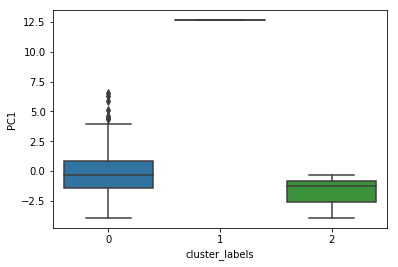

In [567]:
# plots
sns.boxplot(x='cluster_labels', y='PC1', data=pca_df)

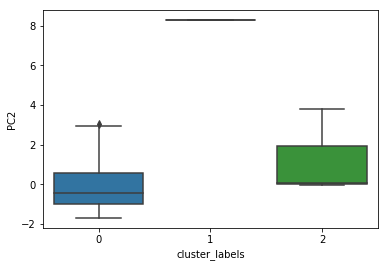

In [568]:
# plots
sns.boxplot(x='cluster_labels', y='PC2', data=pca_df)

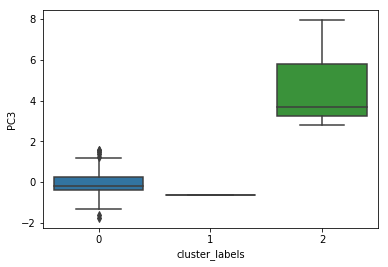

In [569]:
# plots
sns.boxplot(x='cluster_labels', y='PC3', data=pca_df)